In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [97]:
train_df = pd.read_excel('dataset/Flight_Prediction/Data_Train.xlsx')

In [98]:
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [99]:
test_df = pd.read_excel('dataset/Flight_Prediction/Test_set.xlsx')
test_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [100]:
df = pd.concat([train_df,test_df])

In [101]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [102]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [104]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

C:\Users\amil\AppData\Local\Temp\ipykernel_6296\4110469324.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])


In [105]:
df['Day'] = df['Date_of_Journey'].dt.day

In [106]:
df['Month'] = df['Date_of_Journey'].dt.month

In [107]:
df['Year'] = df['Date_of_Journey'].dt.year

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Duration         13354 non-null  object 
 6   Total_Stops      13353 non-null  object 
 7   Additional_Info  13354 non-null  object 
 8   Price            10683 non-null  float64
 9   Day              13354 non-null  int32  
 10  Month            13354 non-null  int32  
 11  Year             13354 non-null  int32  
 12  Arrival_hour     13354 non-null  int32  
 13  Arrival_min      13354 non-null  int32  
 14  Dep_hr           13354 non-null  int32  
 15  Dep_min          13354 non-null  int32  
dtypes: float64(1), int32(7), object(8)
memory usage: 1.4+ MB


In [109]:
df.isna().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Day                   0
Month                 0
Year                  0
dtype: int64

In [110]:
 df.drop('Date_of_Journey',axis = 1, inplace = True)

In [111]:
df['Arrival_Time'] = df['Arrival_Time'].str[:5]

In [112]:
df['Arrival_hour']=df['Arrival_Time'].str[:2].astype(int)
df['Arrival_min'] = df['Arrival_Time'].str[3:5].astype(int)

In [113]:
df.drop('Arrival_Time', axis = 1, inplace = True)

In [114]:
df

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,23h 55m,1 stop,No info,NaN,6,6,2019,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,2h 35m,non-stop,No info,NaN,27,3,2019,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,6h 35m,1 stop,No info,NaN,6,3,2019,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,15h 15m,1 stop,No info,NaN,6,3,2019,19,15


In [115]:
df['Dep_Time']= df['Dep_Time'].astype(str)


In [116]:
df['Dep_Time'].dtype

dtype('O')

In [117]:
df['Dep_hr'] = df['Dep_Time'].str[0:2].astype(int)
df['Dep_min'] = df['Dep_Time'].str[3:5].astype(int)

In [118]:
df

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_min,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,23h 55m,1 stop,No info,NaN,6,6,2019,20,25,20,30
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,2h 35m,non-stop,No info,NaN,27,3,2019,16,55,14,20
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,6h 35m,1 stop,No info,NaN,6,3,2019,4,25,21,50
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,15h 15m,1 stop,No info,NaN,6,3,2019,19,15,4,0


In [95]:
df.drop('Dep_Time',axis = 1 ,inplace = True)

In [120]:
df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [121]:
df

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_min,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,23h 55m,1 stop,No info,NaN,6,6,2019,20,25,20,30
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,2h 35m,non-stop,No info,NaN,27,3,2019,16,55,14,20
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,6h 35m,1 stop,No info,NaN,6,3,2019,4,25,21,50
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,15h 15m,1 stop,No info,NaN,6,3,2019,19,15,4,0


C:\Users\amil\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<Axes: xlabel='Price', ylabel='Airline'>

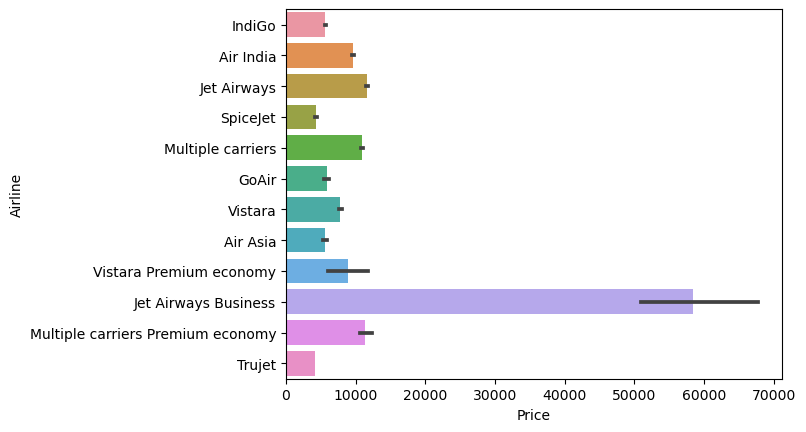

In [127]:
sns.barplot(data = df,x = 'Price', y = 'Airline')

<Axes: xlabel='Airline', ylabel='count'>

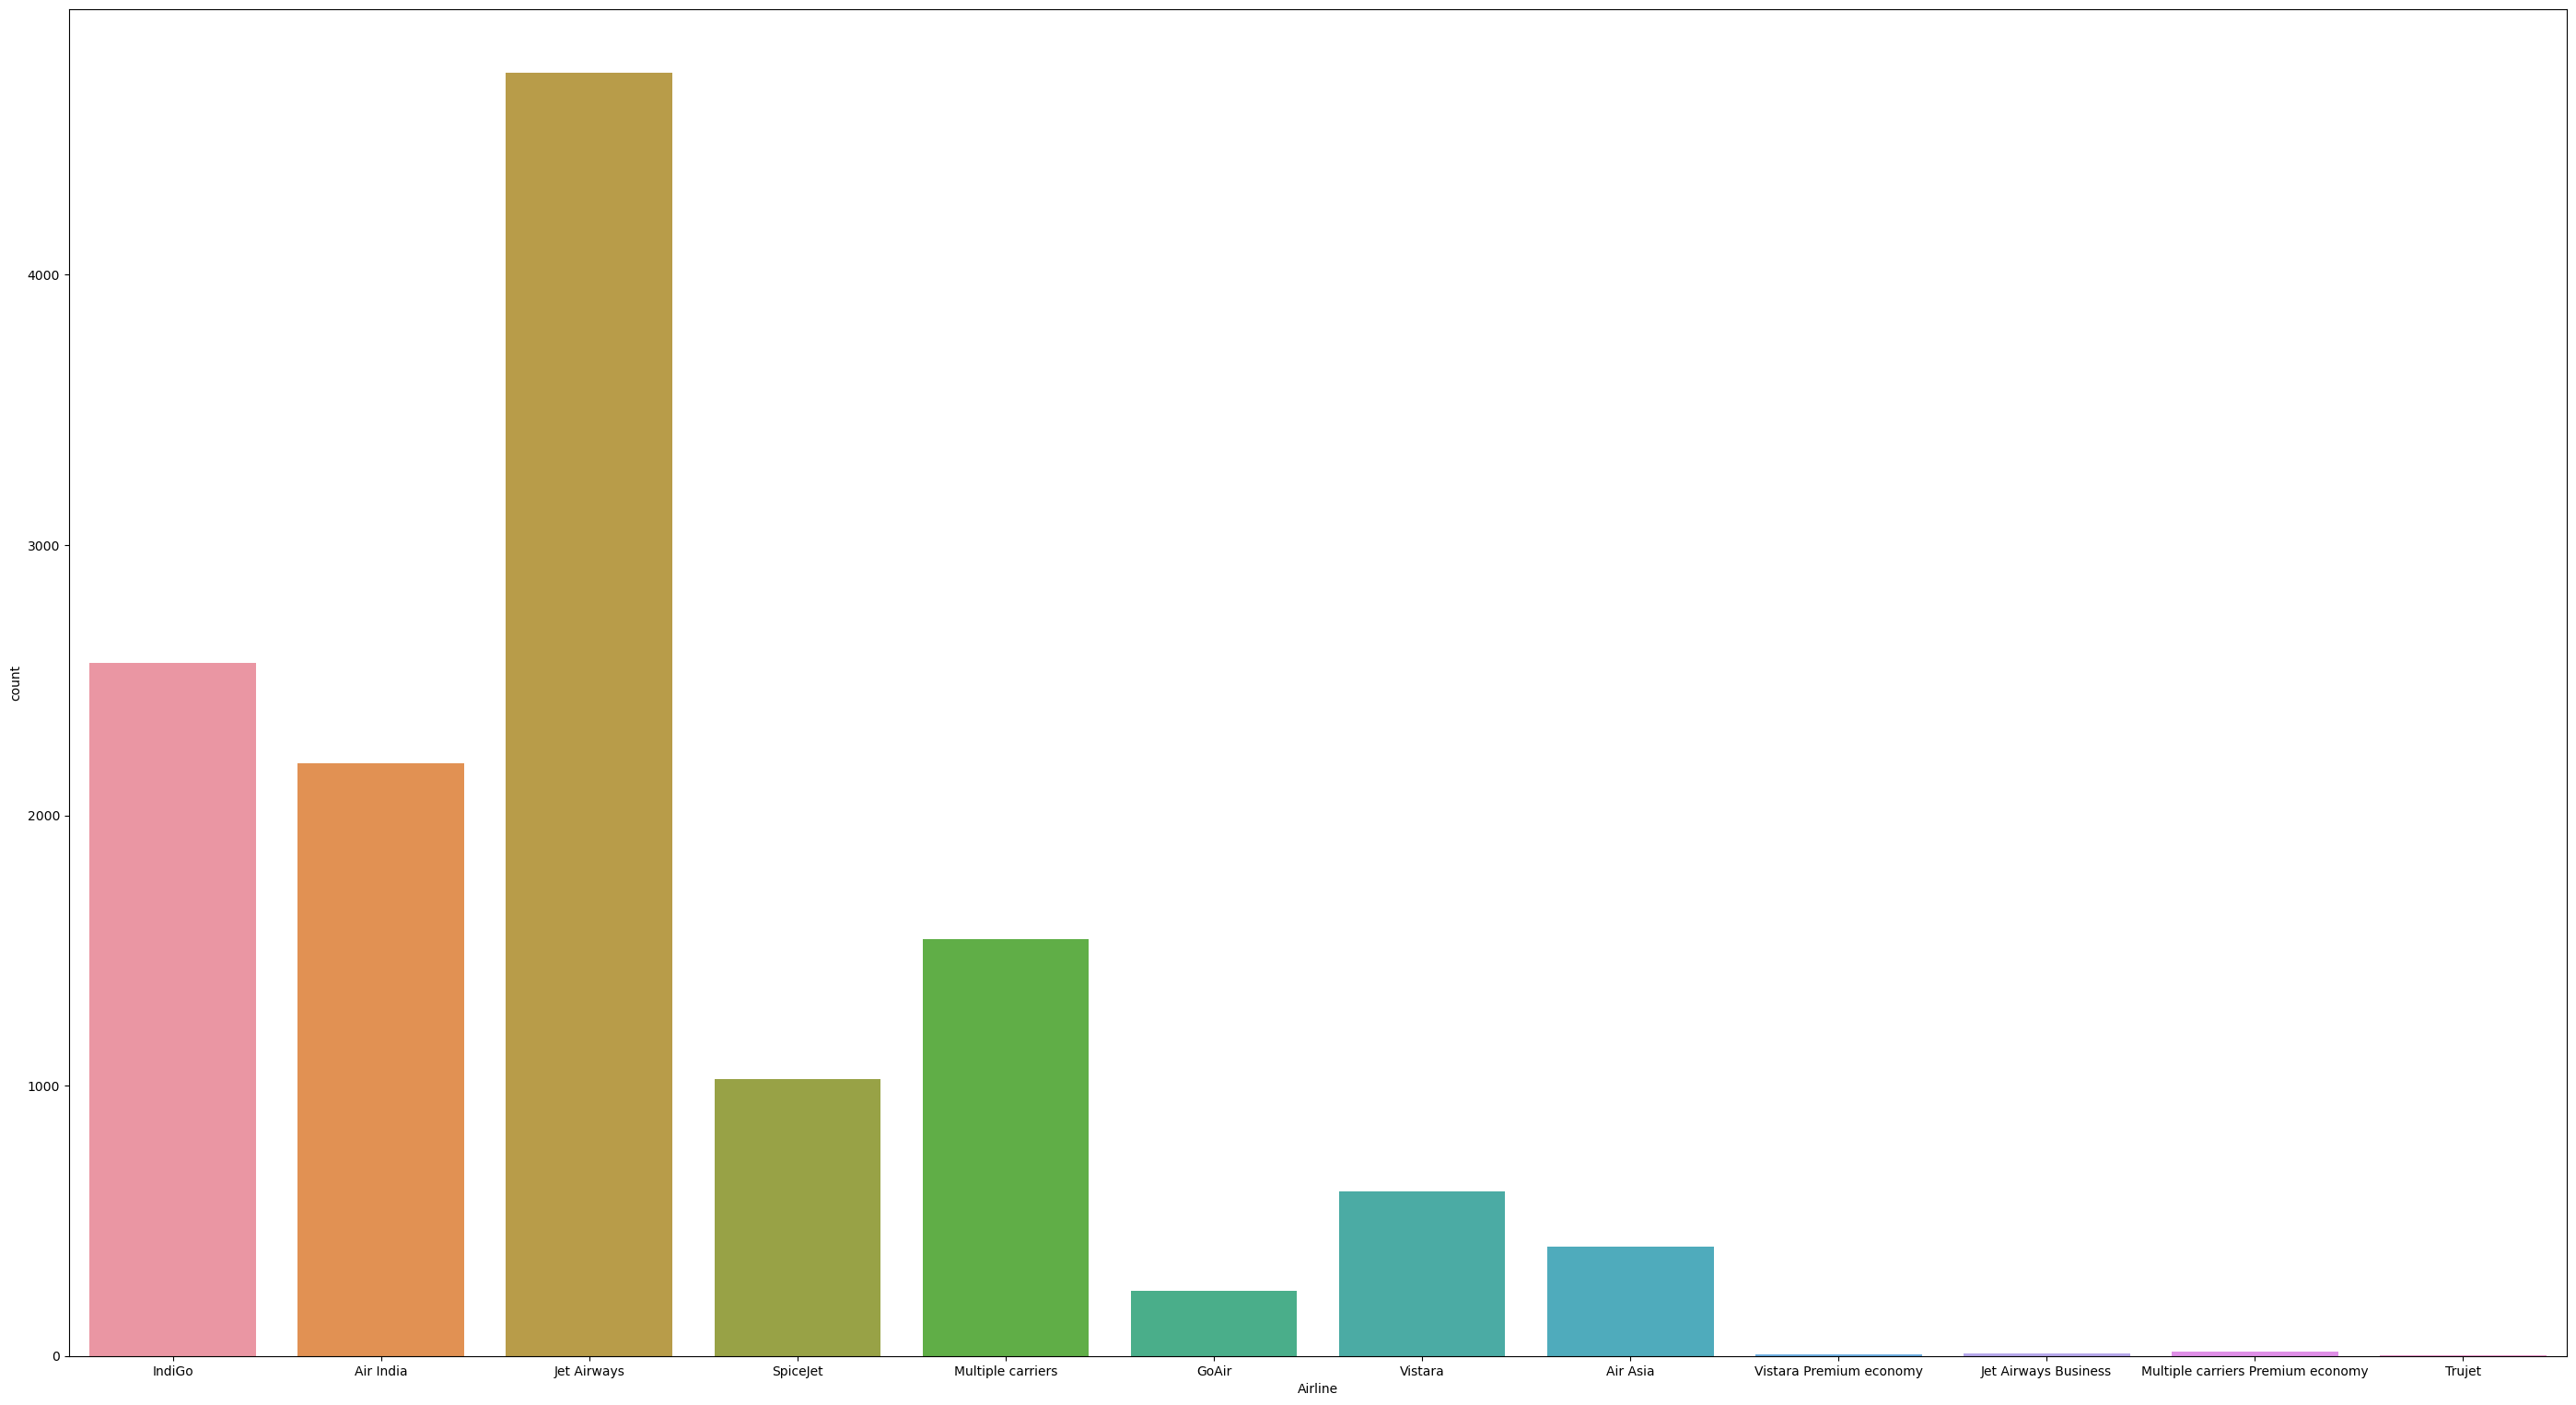

In [135]:
plt.figure(figsize  = (35,19))
sns.countplot(data = df, x= 'Airline')

In [153]:
df['values'] = df[['Source','Destination']].apply(lambda x :','.join(x), axis =1)

In [154]:
df

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_min,Dep_hr,Dep_min,values
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20,"Banglore,New Delhi"
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50,"Kolkata,Banglore"
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25,"Delhi,Cochin"
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5,"Kolkata,Banglore"
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50,"Banglore,New Delhi"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,23h 55m,1 stop,No info,NaN,6,6,2019,20,25,20,30,"Kolkata,Banglore"
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,2h 35m,non-stop,No info,NaN,27,3,2019,16,55,14,20,"Kolkata,Banglore"
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,6h 35m,1 stop,No info,NaN,6,3,2019,4,25,21,50,"Delhi,Cochin"
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,15h 15m,1 stop,No info,NaN,6,3,2019,19,15,4,0,"Delhi,Cochin"


In [155]:
df['values'].unique()

array(['Banglore,New Delhi', 'Kolkata,Banglore', 'Delhi,Cochin',
       'Chennai,Kolkata', 'Banglore,Delhi', 'Mumbai,Hyderabad'],
      dtype=object)

<Axes: xlabel='values', ylabel='count'>

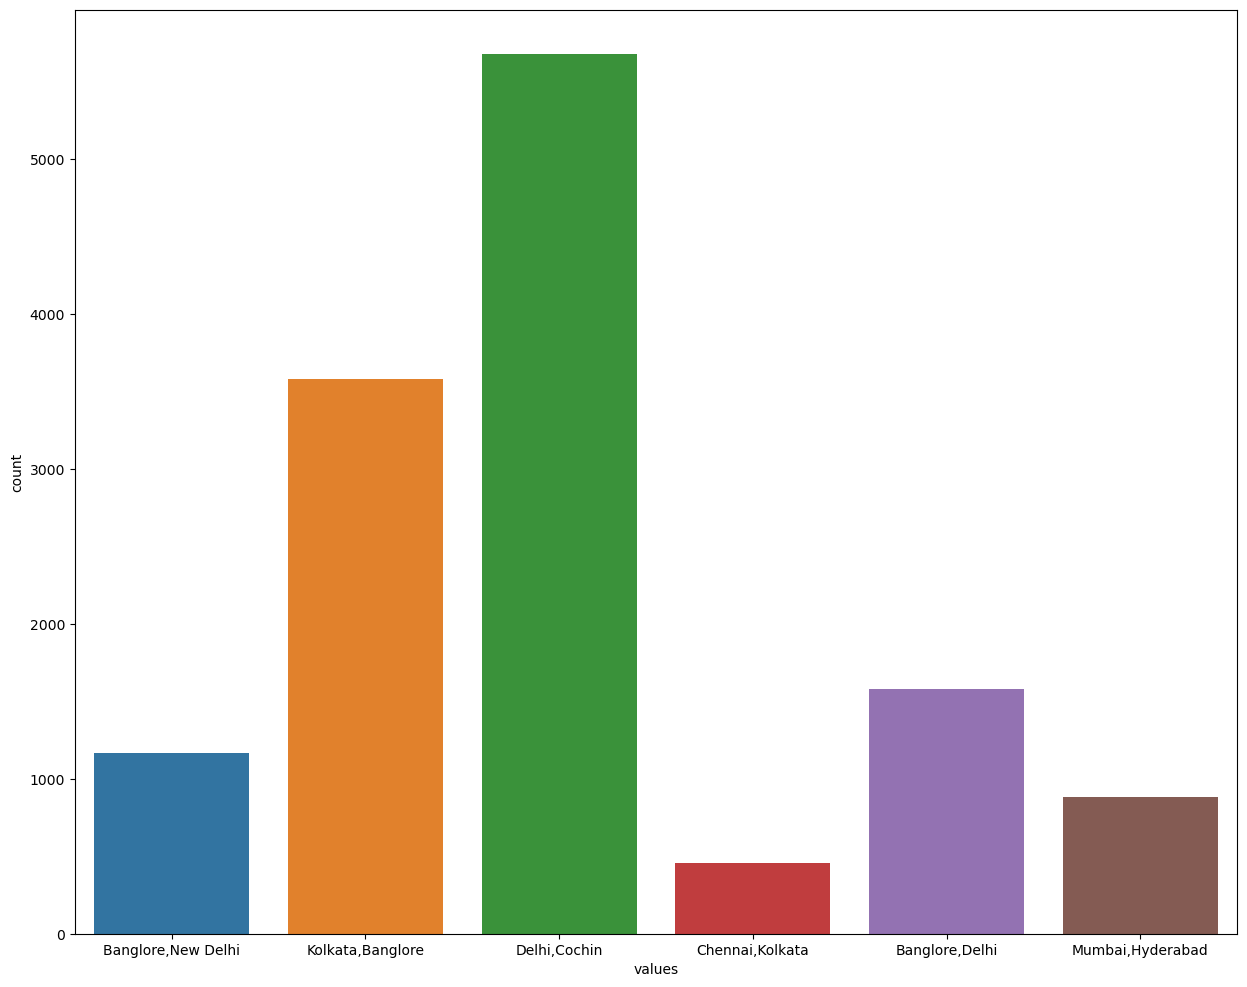

In [159]:
plt.figure(figsize  = (15,12))
sns.countplot(data = df , x = 'values')

In [175]:
dff = df.groupby('values', as_index = False)['Total_Stops'].sum()
dff

,values,Total_Stops
0,"Banglore,Delhi",non-stopnon-stopnon-stopnon-stopnon-stopnon-st...
1,"Banglore,New Delhi",non-stop1 stop1 stop1 stop1 stop1 stop1 stop1 ...
2,"Chennai,Kolkata",non-stopnon-stopnon-stopnon-stopnon-stopnon-st...
3,"Delhi,Cochin",2 stops1 stop1 stop2 stops1 stop1 stop2 stops1...
4,"Kolkata,Banglore",2 stops1 stopnon-stopnon-stop1 stopnon-stop1 s...
5,"Mumbai,Hyderabad",1 stopnon-stopnon-stopnon-stopnon-stopnon-stop...


<Axes: xlabel='values', ylabel='Price'>

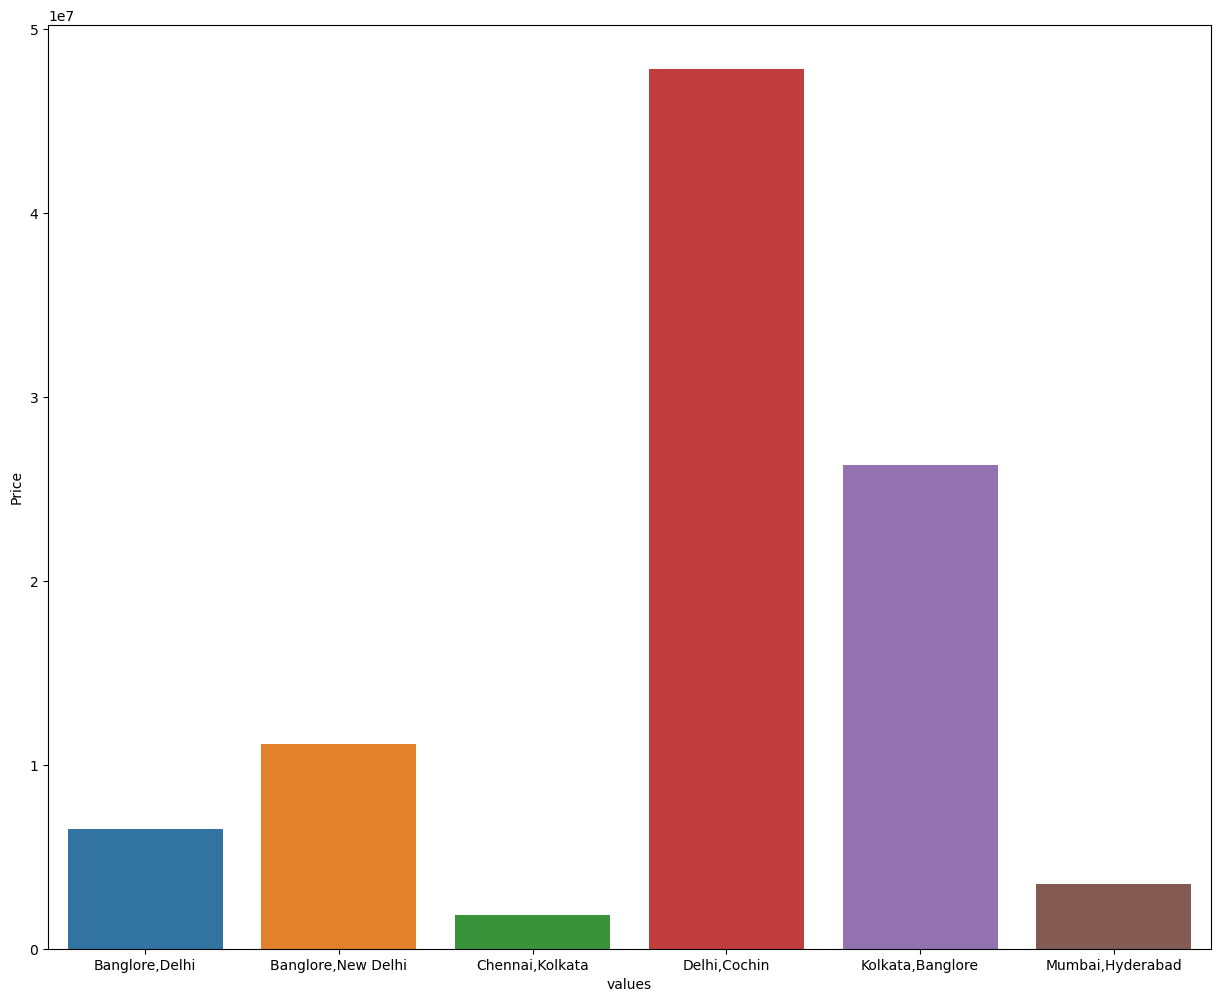

In [167]:
plt.figure(figsize  = (15,12))
sns.barplot(data =dff, x = 'values', y = 'Price')

In [180]:
grouped_df = df.groupby(['Source', 'Destination', 'Total_Stops']).size().reset_index(name = 'Count')
grouped_df

,Source,Destination,Total_Stops,Count
0,Banglore,Delhi,non-stop,1582
1,Banglore,New Delhi,1 stop,703
2,Banglore,New Delhi,2 stops,98
3,Banglore,New Delhi,3 stops,8
4,Banglore,New Delhi,4 stops,2
5,Banglore,New Delhi,non-stop,359
6,Chennai,Kolkata,non-stop,456
7,Delhi,Cochin,1 stop,4015
8,Delhi,Cochin,2 stops,1373
9,Delhi,Cochin,3 stops,31


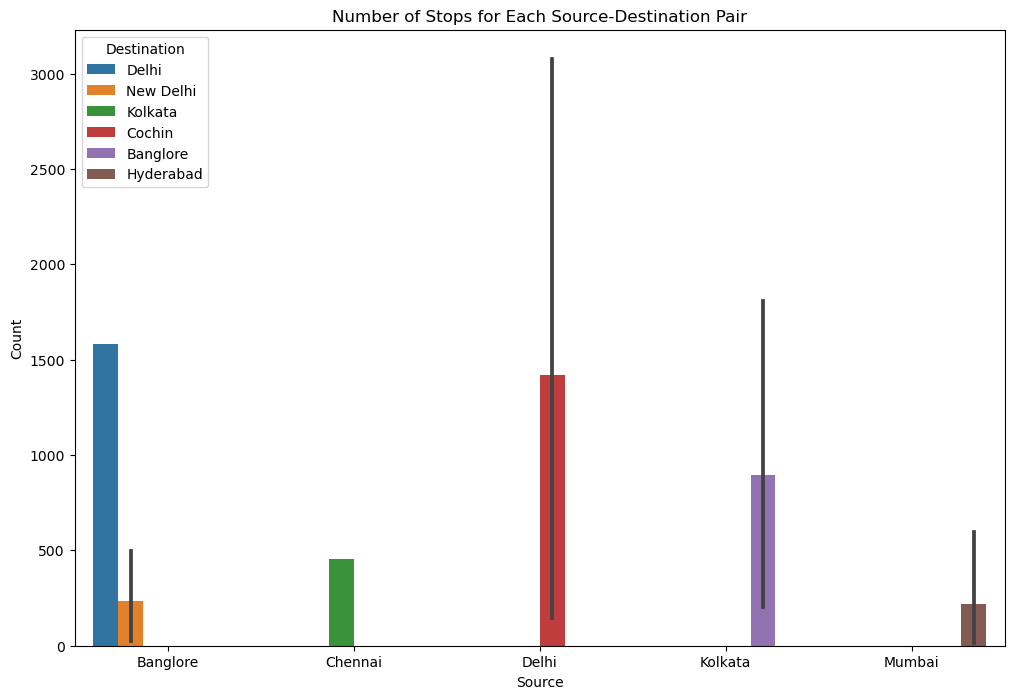

In [186]:
# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_df, x='Source', y='Count', hue='Destination')
plt.title('Number of Stops for Each Source-Destination Pair')
plt.show()


In [197]:
dff= df.groupby(['Airline', 'values'], as_index = False)['values'].size()

In [198]:
dff

,Airline,values,size
0,Air Asia,"Banglore,Delhi",90
1,Air Asia,"Banglore,New Delhi",21
2,Air Asia,"Delhi,Cochin",100
3,Air Asia,"Kolkata,Banglore",194
4,Air India,"Banglore,Delhi",147
5,Air India,"Banglore,New Delhi",266
6,Air India,"Chennai,Kolkata",30
7,Air India,"Delhi,Cochin",933
8,Air India,"Kolkata,Banglore",640
9,Air India,"Mumbai,Hyderabad",176


<Axes: xlabel='Airline', ylabel='count'>

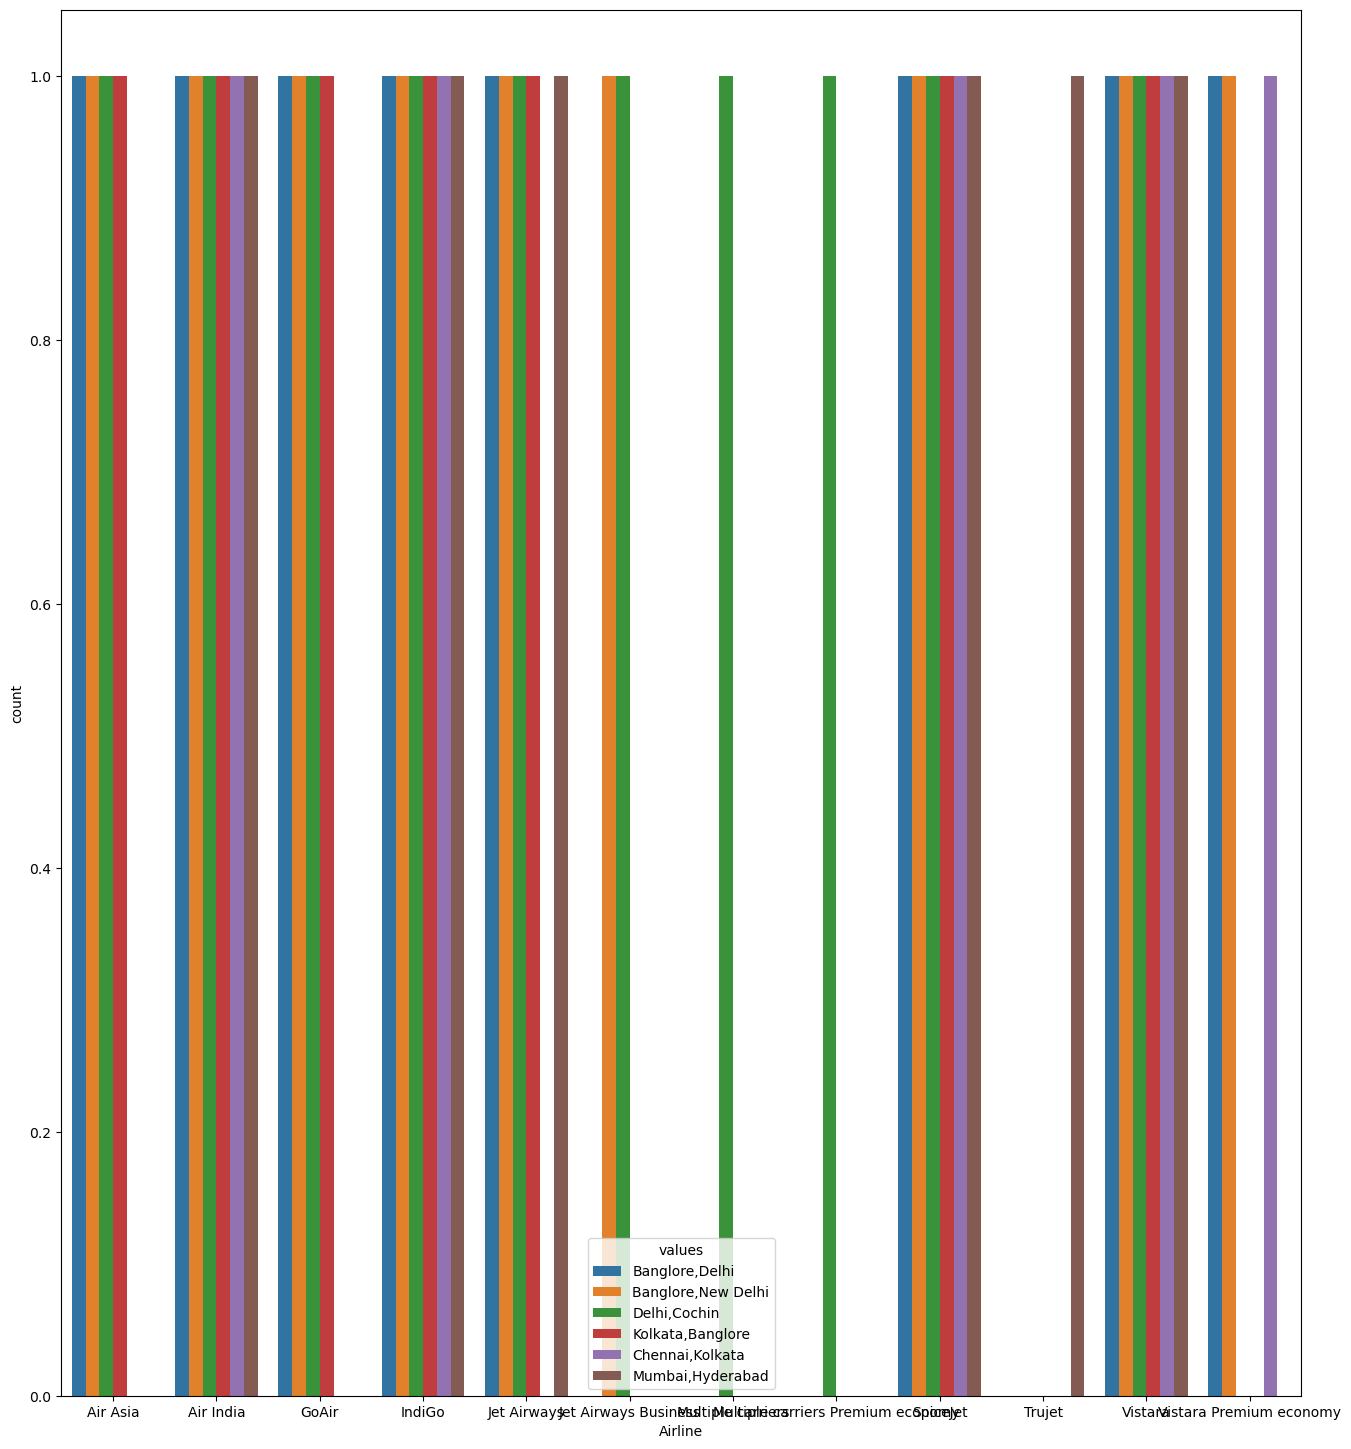

In [208]:
plt.figure(figsize=(16, 18))

sns.countplot(data =dff , x ='Airline', hue= 'values' )

KeyError: '_nolegend_'

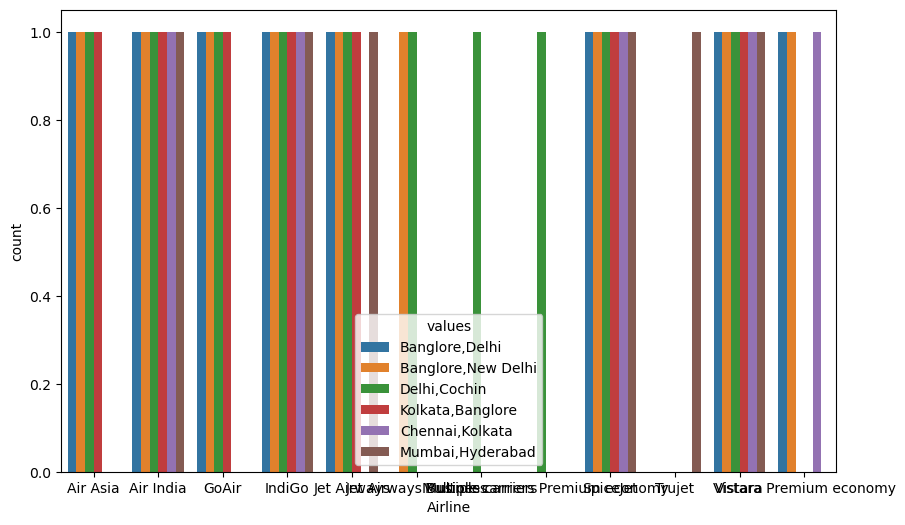

In [210]:

# Create count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=dff, x='Airline', hue='values')

# Custom values to annotate (example: actual counts multiplied by 2)
custom_counts = dff.groupby(['Airline', 'values']).size().unstack().fillna(0) * 2

# Annotate bars with custom values
for p in ax.patches:
    height = p.get_height()
    airline = p.get_x() + p.get_width() / 2 - 0.15
    hue_group = p.get_label()
    custom_value = custom_counts.loc[p.get_x(), hue_group]
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1, f'{custom_value:.0f}', ha='center')

plt.title('Count Plot with Custom Annotations')
plt.show()